In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
root_path = '/dfs/scratch2/dankang/WebGraph/data/2003_webgraph.stats.'
u_root_path = '/dfs/scratch2/dankang/WebGraph/data/2003_webgraph_u.stats.'

In [3]:
def get_root_path(year, get_undirected=False):
    if get_undirected:
        return '/dfs/scratch2/dankang/wb_links/{}/webgraph_u/stats/stats.'.format(year)
    else:
        return '/dfs/scratch2/dankang/wb_links/{}/webgraph/stats/stats.'.format(year)

## Degree Distribution

In [4]:
NUM_NODES = {
    '2003': 376848159,
    '2004': 305121583,
    '2007': 491035062,
    '2010': 676708254
}

def read_degree(year, file_type, bin_size=None):
    root_path = get_root_path(year)
    file_path = root_path + file_type
    
    with open(file_path, "r") as f:
        distrib = [int(line) for line in f]
        
    if bin_size is not None:
        distrib = [sum(distrib[cur: cur+bin_size]) for cur in range(0, len(distrib), bin_size)]

    return distrib


def get_distrib(year, file_type):
    # get indegree frequencies and corresponding indegree value
    indegree = np.asarray(read_degree(year, file_type))
    indegree_inds = np.arange(0, indegree.size)

    # select only non-zeros
    non_zeros = indegree > 0
    indegree = indegree[non_zeros]
    indegree_inds = indegree_inds[non_zeros]

    indegree_prop = indegree / NUM_NODES[str(year)]
    
    # sanity check
    assert indegree.size == indegree_inds.size == indegree_prop.size
    
    result = {
        'indegree': indegree,
        'inds': indegree_inds,
        'prop':indegree_prop,
        'prop_scaled': indegree_prop * 10e8
    }
    
    return result

In [5]:
#years = [2003, 2004, 2007]
years = [2003, 2004,2007,2010]
indegree_dicts = {}
for year in years:
    indegree_dicts[str(year)] = get_distrib(year, 'indegree')

In [6]:
yticks_labels = ['10e-10','10e-9', '10e-8', '10e-7', '10e-6', '10e-5', '10e-4', '10e-3', '10e-2', '10e-1']
yticks_vals = np.array([float(y) for y in yticks_labels]) * 10e8

Text(0.5,1,'Indegree Distribution')

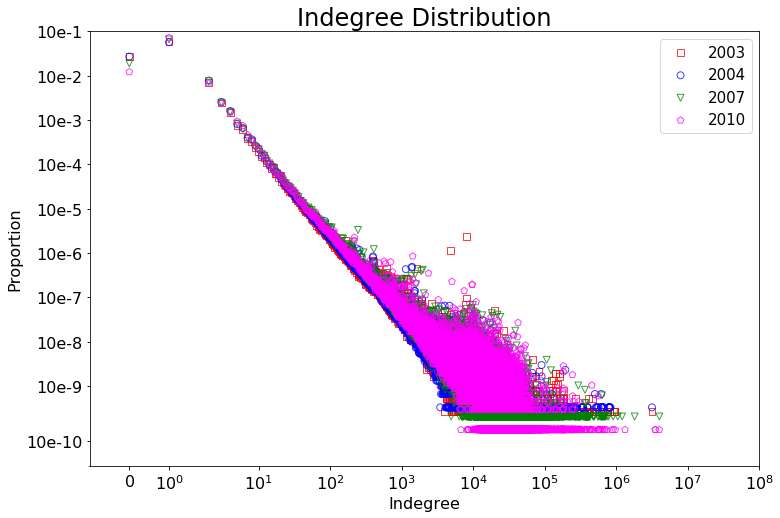

In [13]:
#years = [2003, 2004, 2007]
years = [2003,2004,2007,2010]
colors = ['red', 'blue', 'green','magenta']
markers = ['s', 'o', 'v','p']

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.set_yscale('symlog')
ax.set_xscale('symlog')
plt.yticks(yticks_vals, yticks_labels)
ax.set_xlim(-1,10e7)
ax.set_ylim(10e-5, 10e8) # 10e-2, 10e8

pow_inds = np.array([1.0, 1e5])

for ind, year in enumerate(years):
    indegree_dict = indegree_dicts[str(year)]
    ax.scatter(indegree_dict['inds'], indegree_dict['prop_scaled'], 
               facecolors='none', alpha=0.75, edgecolors=colors[ind], marker=markers[ind], s=48)
    

ax.legend(years, prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("Indegree", fontsize= 16)
ax.set_ylabel("Proportion", fontsize=16)
ax.set_title("Indegree Distribution", fontsize = 24)

In [14]:
years = [2003, 2004, 2007, 2010]
outdegree_dicts = {}
for year in years:
    outdegree_dicts[str(year)] = get_distrib(year, 'outdegree')

Text(0.5,1,'Outdegree Distribution')

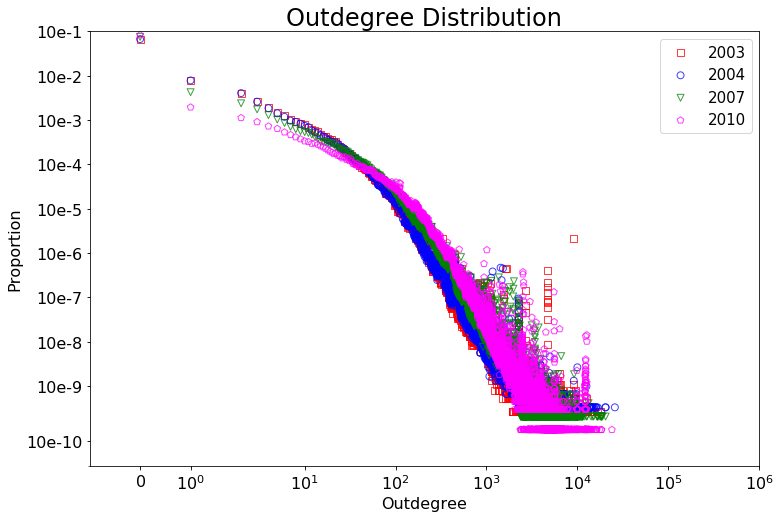

In [15]:
years = [2003,2004,2007,2010]
colors = ['red', 'blue', 'green','magenta']
markers = ['s', 'o', 'v','p']

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.set_yscale('symlog')
ax.set_xscale('symlog')
plt.yticks(yticks_vals, yticks_labels)
ax.set_xlim(-1,10e5)
ax.set_ylim(10e-5, 10e8) # 10e-2, 10e8

pow_inds = np.array([1.0, 1e5])

for ind, year in enumerate(years):
    outdegree_dict = outdegree_dicts[str(year)]
    ax.scatter(outdegree_dict['inds'], outdegree_dict['prop_scaled'], 
               facecolors='none', alpha=0.75, edgecolors=colors[ind], marker=markers[ind], s=48)

ax.legend(years, prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("Outdegree", fontsize= 16)
ax.set_ylabel("Proportion", fontsize=16)
ax.set_title("Outdegree Distribution", fontsize = 24)

In [60]:
def read_sccdistr(year, get_undirected=False):
    root_path = get_root_path(year, get_undirected)
    file_path = root_path + "sccdistr"
    
    sizes = []
    cnts = []
    with open(file_path, "r") as f:
        for line in f:
            parsed = [int(x) for x in line.split()]
            sizes.append(parsed[0])
            cnts.append(parsed[1])
    
    sizes = np.array(sizes)
    cnts = np.array(cnts)
            
    result = {
        'sizes': sizes,
        'cnts': cnts
    }
            
    return result

years = [2003, 2004, 2007]
scc_dicts = {}
for year in years:
    scc_dicts[str(year)] = read_sccdistr(year, False)

Text(0.5,1,'SCC Distribution')

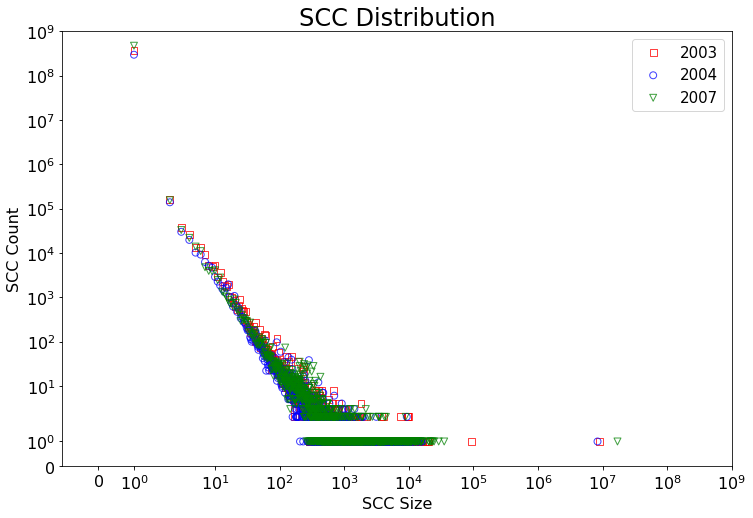

In [69]:
years = [2003, 2004, 2007]
colors = ['red', 'blue', 'green']
markers = ['s', 'o', 'v']

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.set_yscale('symlog')
ax.set_xscale('symlog')
#plt.yticks(yticks_vals, yticks_labels)
ax.set_xlim(-1,10e8)
ax.set_ylim(10e-5, 10e8) # 10e-2, 10e8

pow_inds = np.array([1.0, 1e5])

for ind, year in enumerate(years):
    scc_dict = scc_dicts[str(year)]
    ax.scatter(scc_dict['sizes'], scc_dict['cnts'], 
               facecolors='none', alpha=0.75, edgecolors=colors[ind], marker=markers[ind], s=48)

ax.legend(years, prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("SCC Size", fontsize= 16)
ax.set_ylabel("SCC Count", fontsize=16)
ax.set_title("SCC Distribution", fontsize = 24)

In [63]:
years = [2003, 2004, 2007]
wcc_dicts = {}
for year in years:
    wcc_dicts[str(year)] = read_sccdistr(year, True)

Text(0.5,1,'WCC Distribution')

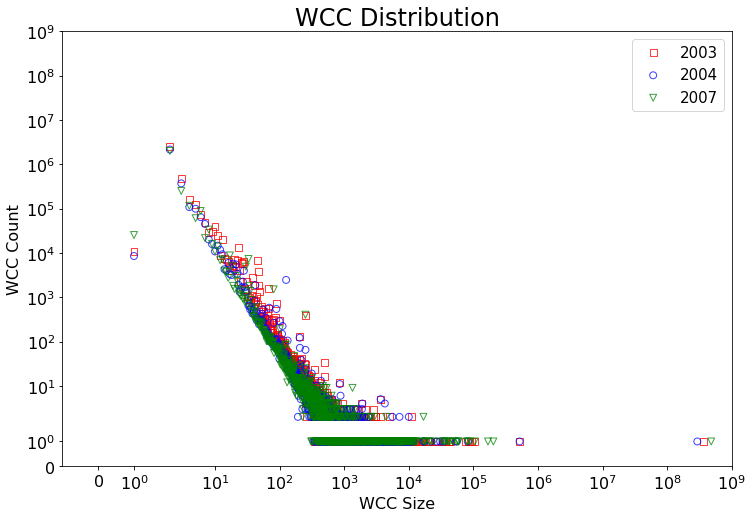

In [68]:
years = [2003, 2004, 2007]
colors = ['red', 'blue', 'green']
markers = ['s', 'o', 'v']

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_xlim(-1,10e8)
ax.set_ylim(10e-5, 10e8) # 10e-2, 10e8

pow_inds = np.array([1.0, 1e5])

for ind, year in enumerate(years):
    wcc_dict = wcc_dicts[str(year)]
    ax.scatter(wcc_dict['sizes'], wcc_dict['cnts'], 
               facecolors='none', alpha=0.75, edgecolors=colors[ind], marker=markers[ind], s=48)

ax.legend(years, prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("WCC Size", fontsize= 16)
ax.set_ylabel("WCC Count", fontsize=16)
ax.set_title("WCC Distribution", fontsize = 24)

# Previous Code

In [ ]:
indegree_prop = np.asarray(indegree_2003) / NUM_NODES_2003 
indegree_prop = np.asarray(indegree_2004) / NUM_NODES_2004
indegree_prop = np.asarray(indegree_2007) / NUM_NODES_2007

In [6]:
inds_2003 = list(range(len(indegree_2003)))
inds_2004 = list(range(len(indegree_2004)))
inds_2007 = list(range(len(indegree_2007)))

Text(0.5,1,'Indegree Distribution')

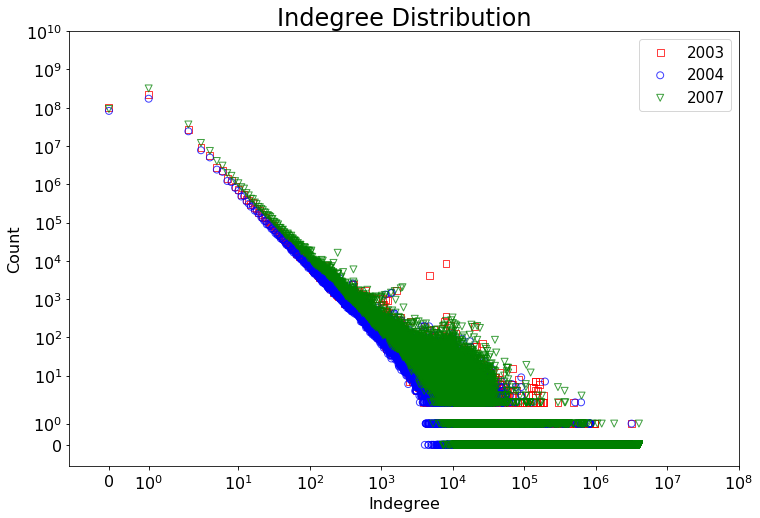

In [11]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.scatter(inds_2003,indegree_2003, facecolors='none', alpha=0.75, edgecolors='red', marker='s', s=48)
ax.scatter(inds_2004,indegree_2004, facecolors='none', alpha=0.75, edgecolors='blue', marker='o', s=48)
ax.scatter(inds_2007,indegree_2007, facecolors='none', alpha=0.75, edgecolors='green', marker='v', s=48)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_ylim(-1, 10e9)
ax.set_xlim(-1,10e7)
ax.legend(["2003","2004", "2007"], prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("Indegree", fontsize= 16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Indegree Distribution", fontsize = 24)

In [7]:
np_indegree_2003 = np.asarray(indegree_2003) / NUM_NODES_2003 * 10e8
np_indegree_2004 = np.asarray(indegree_2004) / NUM_NODES_2004 * 10e8
np_indegree_2007 = np.asarray(indegree_2007) / NUM_NODES_2007 * 10e8

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.scatter(inds_2003,np_indegree_2003, facecolors='none', alpha=0.75, edgecolors='red', marker='s', s=48)
ax.scatter(inds_2004,np_indegree_2004, facecolors='none', alpha=0.75, edgecolors='blue', marker='o', s=48)
ax.scatter(inds_2007,np_indegree_2007, facecolors='none', alpha=0.75, edgecolors='green', marker='v', s=48)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_ylim(-1, 10e9)
ax.set_xlim(-1,10e7)
ax.legend(["2003","2004", "2007"], prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("Indegree", fontsize= 16)
ax.set_ylabel("(Count x 10e8) / (Number of Nodes)", fontsize=16)
ax.set_title("Indegree Distribution (Proportion)", fontsize = 24)

Text(0.5,1,'Indegree Distribution (Proportion)')

### TODO - outdegree

In [22]:
outdegree_2003 = read_degree(2003, 'outdegree')
outdegree_2004 = read_degree(2004, 'outdegree')
outdegree_2007 = read_degree(2007, 'outdegree')

outdegree_inds_2003 = list(range(len(outdegree_2003)))
outdegree_inds_2004 = list(range(len(outdegree_2004)))
outdegree_inds_2007 = list(range(len(outdegree_2007)))

In [23]:
print(len(outdegree_2003))
print(len(outdegree_2004))
print(len(outdegree_2007))

18404
25849
20466


Text(0.5,1,'Outdegree Distribution')

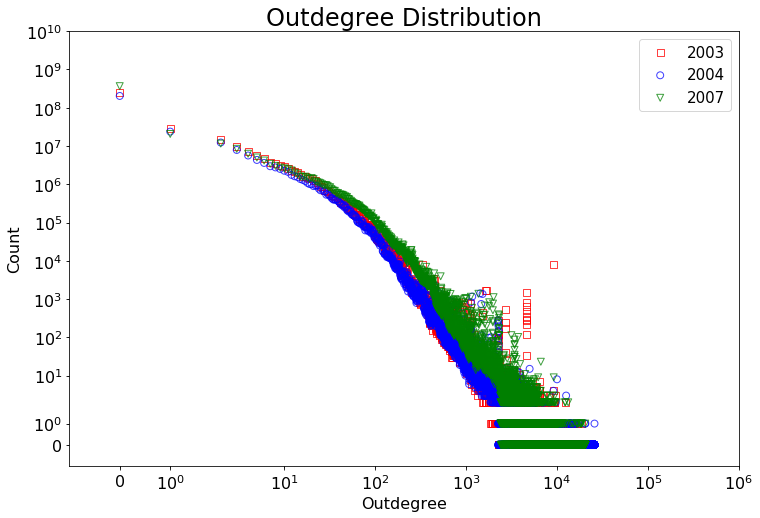

In [24]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.scatter(outdegree_inds_2003,outdegree_2003, facecolors='none', alpha=0.75, edgecolors='red', marker='s', s=48)
ax.scatter(outdegree_inds_2004,outdegree_2004, facecolors='none', alpha=0.75, edgecolors='blue', marker='o', s=48)
ax.scatter(outdegree_inds_2007,outdegree_2007, facecolors='none', alpha=0.75, edgecolors='green', marker='v', s=48)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_ylim(-1, 10e9)
ax.set_xlim(-1,10e5)
ax.legend(["2003","2004", "2007"], prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("Outdegree", fontsize= 16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title("Outdegree Distribution", fontsize = 24)

In [25]:
np_outdegree_2003 = np.asarray(outdegree_2003) / NUM_NODES_2003 * 10e8
np_outdegree_2004 = np.asarray(outdegree_2004) / NUM_NODES_2004 * 10e8
np_outdegree_2007 = np.asarray(outdegree_2007) / NUM_NODES_2007 * 10e8

Text(0.5,1,'Outdegree Distribution (Proportion)')

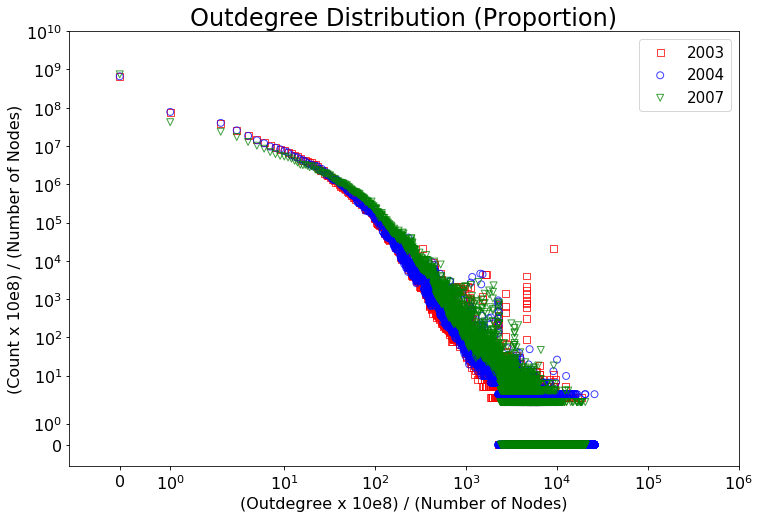

In [26]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.scatter(outdegree_inds_2003,np_outdegree_2003, facecolors='none', alpha=0.75, edgecolors='red', marker='s', s=48)
ax.scatter(outdegree_inds_2004,np_outdegree_2004, facecolors='none', alpha=0.75, edgecolors='blue', marker='o', s=48)
ax.scatter(outdegree_inds_2007,np_outdegree_2007, facecolors='none', alpha=0.75, edgecolors='green', marker='v', s=48)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_ylim(-1, 10e9)
ax.set_xlim(-1,10e5)
ax.legend(["2003","2004", "2007"], prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("Outdegree", fontsize= 16)
ax.set_ylabel("Outdegree (proportion) * 10e8 ", fontsize=16)
ax.set_title("Outdegree Distribution (Proportion)", fontsize = 24)

## Strongly Connected Components Distribution

In [5]:
def read_sccdistr(year):
    root_path = get_root_path(year)
    file_path = root_path + "sccdistr"
    
    sizes = []
    cnts = []
    with open(file_path, "r") as f:
        for line in f:
            parsed = [int(x) for x in line.split()]
            sizes.append(parsed[0])
            cnts.append(parsed[1])
            
    return sizes, cnts

scc_sizes_2003, scc_cnts_2003 = read_sccdistr(2003)
scc_sizes_2004, scc_cnts_2004 = read_sccdistr(2004)
scc_sizes_2007, scc_cnts_2007 = read_sccdistr(2007)

print(scc_sizes_2003[0])
print(scc_sizes_2007[0])

print(scc_cnts_2003[0])
print(scc_cnts_2007[0])

8861345
16995347
1
1


Text(0.5,1,'SCC Distribution')

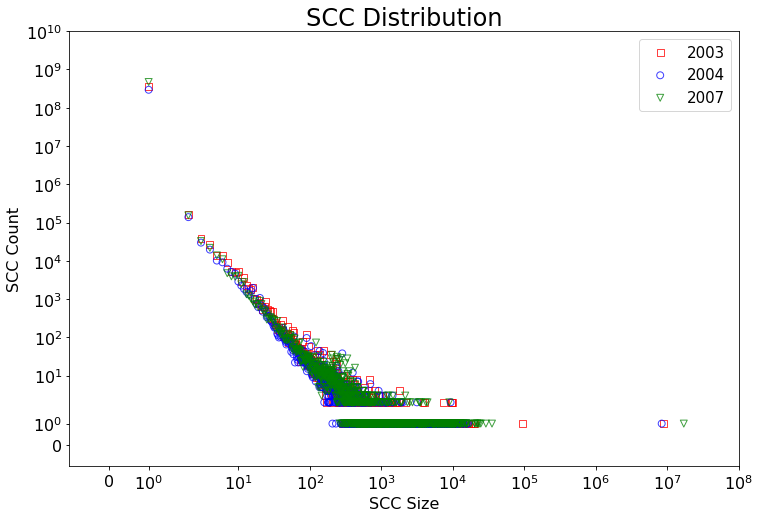

In [17]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.scatter(scc_sizes_2003,scc_cnts_2003, facecolors='none', alpha=0.75, edgecolors='red', marker='s', s=48)
ax.scatter(scc_sizes_2004,scc_cnts_2004, facecolors='none', alpha=0.75, edgecolors='blue', marker='o', s=48)
ax.scatter(scc_sizes_2007,scc_cnts_2007, facecolors='none', alpha=0.75, edgecolors='green', marker='v', s=48)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_ylim(-1, 10e9)
ax.set_xlim(-1,10e7)
ax.legend(["2003","2004", "2007"], prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("SCC Size", fontsize= 16)
ax.set_ylabel("SCC Count", fontsize=16)
ax.set_title("SCC Distribution", fontsize = 24)

In [6]:
np_scc_sizes_2003 = np.asarray(scc_sizes_2003) / NUM_NODES_2003 * 10e8
np_scc_cnts_2003 = np.asarray(scc_cnts_2003) / sum(scc_cnts_2003) * 10e8

np_scc_sizes_2004 = np.asarray(scc_sizes_2004) / NUM_NODES_2004 * 10e8
np_scc_cnts_2004 = np.asarray(scc_cnts_2004) / NUM_NODES_2004 * 10e8

np_scc_sizes_2007 = np.asarray(scc_sizes_2007) / NUM_NODES_2007 * 10e8
np_scc_cnts_2007 = np.asarray(scc_cnts_2007) / NUM_NODES_2007 * 10e8

Text(0.5,1,'SCC Distribution (Proportion)')

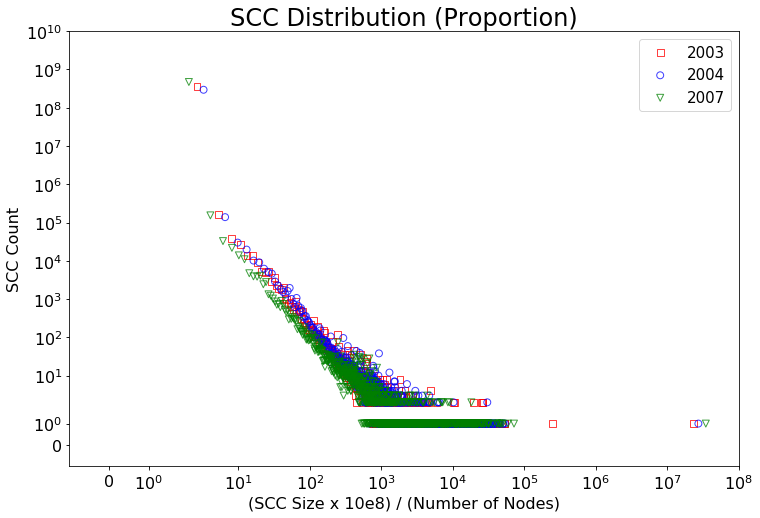

In [8]:
scc_sizes_2003

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.scatter(np_scc_sizes_2003, scc_cnts_2003, facecolors='none', alpha=0.75, edgecolors='red', marker='s', s=48)
ax.scatter(np_scc_sizes_2004, scc_cnts_2004, facecolors='none', alpha=0.75, edgecolors='blue', marker='o', s=48)
ax.scatter(np_scc_sizes_2007, scc_cnts_2007, facecolors='none', alpha=0.75, edgecolors='green', marker='v', s=48)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_ylim(-1,10e9)
ax.set_xlim(-1,10e7)
ax.legend(["2003","2004","2007"], prop={'size': 15})
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
ax.set_xlabel("(SCC Size x 10e8) / (Number of Nodes)", fontsize= 16)
#ax.set_ylabel("(SCC Count x 10e8) / (Number of Nodes)", fontsize=16)
ax.set_ylabel("SCC Count", fontsize=16)
ax.set_title("SCC Distribution (Proportion)", fontsize = 24)

## 